In [11]:
import pandas as pd
pd.set_option("display.max_columns", 150)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
citibike = pd.read_csv('../data/citibike_vis.csv')
citibike  = citibike.drop(columns = 'Unnamed: 0') #dropping extra column
citibike = citibike.sort_values('date').reset_index(drop = True) #sorting the values by date and resetting index.

In [9]:
citibike['date'] = pd.to_datetime(citibike['date'])
citibike['day_of_week'] = citibike['day_of_week'].astype(str) #changing the day of week column to string.

In [12]:
linreg = LinearRegression()

In [13]:
citibike.columns

Index(['date', 'num_of_trips', 'holiday', 'prcp', 'snow', 'tmax', 'tmin',
       'median_trip_duration', 'mean_trip_duration', 'day_of_week', 'year',
       'month', 'season', 'is_snow', 'did_rain'],
      dtype='object')

In [19]:
predictors = ['tmax']

X = citibike[predictors]
y = citibike['num_of_trips'] 

#splitting the X and y varibles for training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 117)

linreg_temp = linreg.fit(X_train, y_train)
y_pred = linreg_temp.predict(X_test)

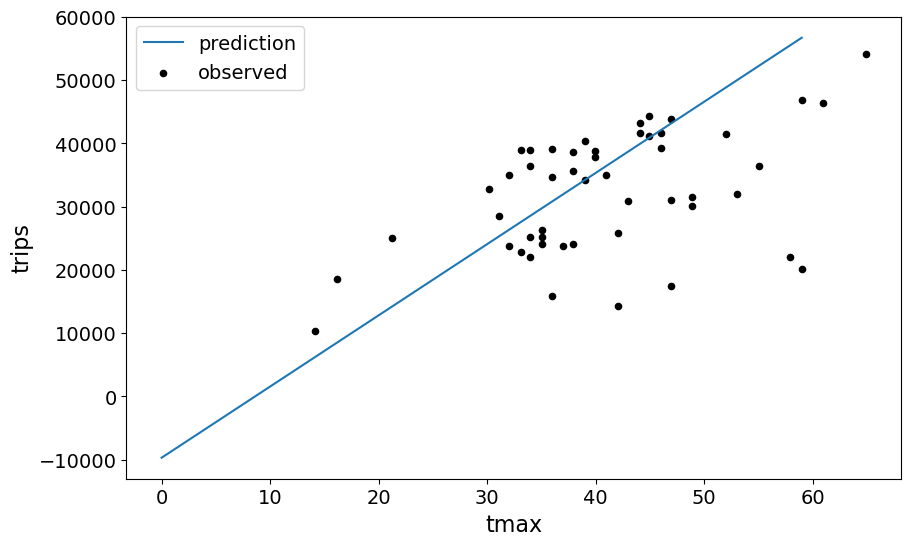

In [22]:
x_grid = np.linspace(start = 0, stop = np.max(citibike['tmax'].head(25)))
x_grid = pd.DataFrame({
    'tmax': x_grid
})
y_grid = linreg.predict(x_grid)

fontsize = 16

fig, ax = plt.subplots(figsize = (10,6))


plt.plot(x_grid, y_grid, label = 'prediction')

citibike.head(50).plot(kind = 'scatter',
                    x = 'tmax',
                    y = 'num_of_trips',
                    ax = ax,
                    color = 'black',
                    label = 'observed')

plt.legend(fontsize = fontsize - 2)


plt.xlabel('tmax', fontsize = fontsize)
plt.ylabel('trips', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2)
plt.yticks(fontsize = fontsize - 2);

In [24]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(y_test.std())

391875904.54565287
15413.98201547318
0.4938316460514631
27875.37660768082


In [25]:
predictors = ['tmax','is_snow', 'did_rain', 'day_of_week', 'holiday', 'season', 'month']
cat_predictors = ['is_snow', 'did_rain', 'day_of_week', 'holiday', 'season', 'month']

X = citibike[predictors]
X = pd.get_dummies(X, columns = cat_predictors)
y = citibike['num_of_trips'] 

#splitting the X and y varibles for training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 117)

linreg_all = linreg.fit(X_train, y_train)
y_pred_all = linreg_all.predict(X_test)

In [29]:
print(f'MSE: {mean_squared_error(y_test, y_pred_all)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_all)}')
print(f'R^2: {r2_score(y_test, y_pred_all)}')
print(f'std: {y_test.std()}')

MSE: 283599240.10512
MAE: 13094.82811718474
R^2: 0.6336877085834165
std: 27875.37660768082
